# 0816050 施雅青

# Outline
## 1. Linear Regression
    1-1 Data generation
    1-2 Preprocessing. Model Construction and Result
    1-3 Bonus
## 2. Logistic Regression
    2-1 Data generation
    2-2 Model Construction and Result

## 1. Linear Regression

In [79]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
import operator
from IPython.display import display, Math, Latex

## 1-1 Data generation

No handles with labels found to put in legend.


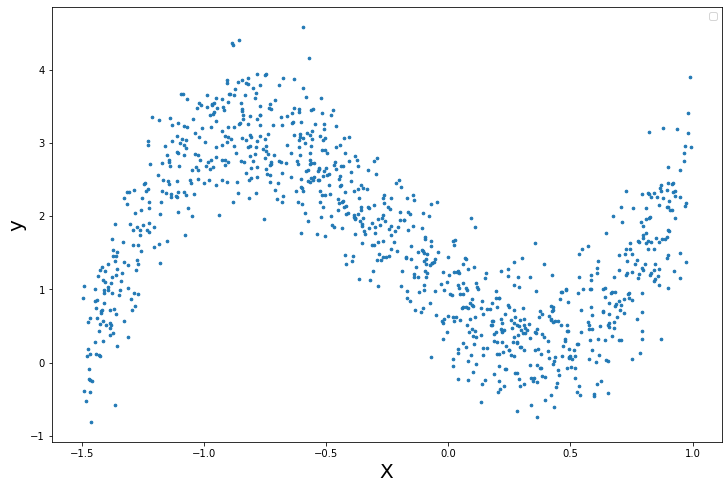

In [87]:
X = np.random.uniform(low=-1.5, high=1.0, size=(1000,1))
y_create = [3*i*i*i+ 2*i*i- 3*i +1 + np.random.normal(0, 0.5) for i in X]
y = np.array(y_create)
# print(X.shape)
# print(y.shape)
plt.figure(figsize=(12,8))
plt.scatter(X, y, s=7)
plt.xlabel('X', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.legend()
plt.show()

## 1-2 Preprocessing. Model Construction and Result

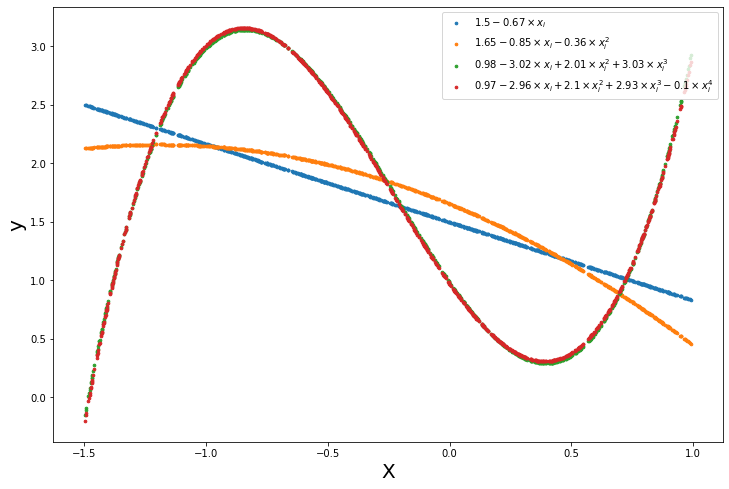

degree(K) = 1
fitted weights:  -0.67
equation: 


<IPython.core.display.Math object>

degree(K) = 2
fitted weights:  -0.85   -0.36
equation: 


<IPython.core.display.Math object>

degree(K) = 3
fitted weights:  -3.02   2.01   3.03
equation: 


<IPython.core.display.Math object>

degree(K) = 4
fitted weights:  -2.96   2.1   2.93   -0.1  
equation: 


<IPython.core.display.Math object>

In [91]:
'''
    1. use PolynomialFeatures() to generate degree-K polynomial features x_head from x, K = 1~4
    2. model construction: LinearRegression()
    3. result: shown below
'''
poly1 = PolynomialFeatures(degree=1, interaction_only=False, include_bias=True)
X_one = poly1.fit_transform(X)
model1 = LinearRegression(fit_intercept=True)
model1.fit(X_one, y)
y_pred1 = model1.predict(X_one)
plt.figure(figsize=(12,8))

# plt.scatter(X, y, s=7)
i ="$ "+ str(round(model1.intercept_[0],2))  + str(round(model1.coef_[0][1],2))+" \\times  " +" x_i" + "$"
L = sorted(zip(X,y_pred1), key=operator.itemgetter(0))
new_x, new_y = zip(*L)
plt.scatter(new_x, new_y, label=i, s=7)

# plt.scatter(X, y_pred1, s=7, label=i)

poly2 = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
X_two = poly2.fit_transform(X)
model2 = LinearRegression(fit_intercept=True)
model2.fit(X_two, y)
y_pred2 = model2.predict(X_two)
i2 ="$ "+ str(round(model2.intercept_[0],2))  + str(round(model2.coef_[0][1],2))+\
" \\times  " +" x_i" +str(round(model2.coef_[0][2],2))+" \\times  " +" x_i^2" "$"
# plt.scatter(X, y, s=7)
L2 = sorted(zip(X,y_pred2), key=operator.itemgetter(0))
new_x2, new_y2 = zip(*L2)
plt.scatter(new_x2, new_y2, label=i2, s=7)

# plt.scatter(X, y_pred2, s=7, label=i2)

poly_3 = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_thr = poly_3.fit_transform(X)
# print(X_thr)
model3 = LinearRegression(fit_intercept=True)
model3.fit(X_thr, y)
y_pred3 = model3.predict(X_thr)
# # plt.scatter(X, y, s=7)
i3 ="$ "+ str(round(model3.intercept_[0],2))  + str(round(model3.coef_[0][0],2))+\
" \\times  " +" x_i" +" + "+str(round(model3.coef_[0][1],2))+" \\times  " +" x_i^2" \
+" + "+str(round(model3.coef_[0][2],2))+" \\times  " +" x_i^3" "$"
L3 = sorted(zip(X,y_pred3), key=operator.itemgetter(0))
new_x3, new_y3 = zip(*L3)
plt.scatter(new_x3, new_y3, label=i3, s=7)
# plt.scatter(X, y_pred3, s=7,label=i3)


poly_4 = PolynomialFeatures(degree=4, interaction_only=False, include_bias=True)
X_four = poly_4.fit_transform(X)
model4 = LinearRegression(fit_intercept=True)
model4.fit(X_four, y)
y_pred4 = model4.predict(X_four)
# plt.scatter(X, y, s=7)
i4 ="$ "+ str(round(model4.intercept_[0],2))  + str(round(model4.coef_[0][1],2))+\
" \\times  " +" x_i" +" + "+str(round(model4.coef_[0][2],2))+" \\times  " +" x_i^2" \
+" + "+str(round(model4.coef_[0][3],2))+" \\times  " +" x_i^3"  
if round(model4.coef_[0][4],2) > 0:
    i4 += " + "+ str(round(model4.coef_[0][4],2))+" \\times  " +" x_i^4" "$"
else:
    i4 += str(round(model4.coef_[0][4],2))+" \\times  " +" x_i^4" "$"

L4 = sorted(zip(X,y_pred4), key=operator.itemgetter(0))
new_x4, new_y4 = zip(*L4)
plt.scatter(new_x4, new_y4, label=i4, s=7)
# plt.scatter(X, y_pred4,label=i4)

plt.xlabel('X', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.legend()
plt.show()

print("degree(K) = 1")
print("fitted weights: ", round(model1.coef_[0][1],2))
print('equation: ')
display(Math("$ y_i = $" + i))

print("degree(K) = 2")
print("fitted weights: ", round(model2.coef_[0][1],2), ' ', round(model2.coef_[0][2],2))
print('equation: ')
display(Math("$ y_i = $" + i2))

print("degree(K) = 3")
print("fitted weights: ", round(model3.coef_[0][0],2), ' '\
      , round(model3.coef_[0][1],2), ' ', round(model3.coef_[0][2],2))
print('equation: ')
display(Math("$ y_i = $" + i3))

print("degree(K) = 4")
print("fitted weights: ", round(model4.coef_[0][1],2), ' '\
      , round(model4.coef_[0][2],2), ' ', round(model4.coef_[0][3],2), ' '\
      , round(model4.coef_[0][4],2), ' ')
print('equation: ')
display(Math("$ y_i = $" + i4))

## 1-3 Bonus

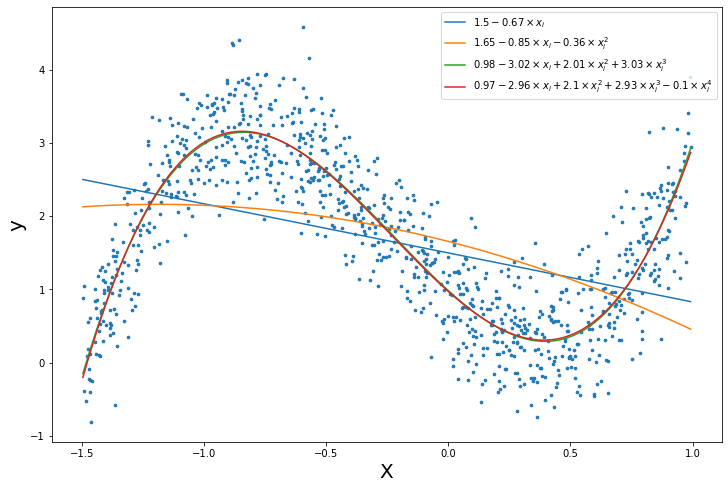

In [92]:

poly1 = PolynomialFeatures(degree=1, interaction_only=False, include_bias=True)
X_one = poly1.fit_transform(X)
model1 = LinearRegression(fit_intercept=True)
model1.fit(X_one, y)
y_pred1 = model1.predict(X_one)
plt.figure(figsize=(12,8))

plt.scatter(X, y, s=7)
i ="$ "+ str(round(model1.intercept_[0],2))  + str(round(model1.coef_[0][1],2))+" \\times  " +" x_i" + "$"
L = sorted(zip(X,y_pred1), key=operator.itemgetter(0))
new_x, new_y = zip(*L)
plt.plot(new_x, new_y, label=i)

# plt.scatter(X, y_pred1, s=7, label=i)

poly2 = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
X_two = poly2.fit_transform(X)
model2 = LinearRegression(fit_intercept=True)
model2.fit(X_two, y)
y_pred2 = model2.predict(X_two)
i2 ="$ "+ str(round(model2.intercept_[0],2))  + str(round(model2.coef_[0][1],2))+\
" \\times  " +" x_i" +str(round(model2.coef_[0][2],2))+" \\times  " +" x_i^2" "$"
# plt.scatter(X, y, s=7)
L2 = sorted(zip(X,y_pred2), key=operator.itemgetter(0))
new_x2, new_y2 = zip(*L2)
plt.plot(new_x2, new_y2, label=i2)

# plt.scatter(X, y_pred2, s=7, label=i2)

poly_3 = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_thr = poly_3.fit_transform(X)
# print(X_thr)
model3 = LinearRegression(fit_intercept=True)
model3.fit(X_thr, y)
y_pred3 = model3.predict(X_thr)
# # plt.scatter(X, y, s=7)
i3 ="$ "+ str(round(model3.intercept_[0],2))  + str(round(model3.coef_[0][0],2))+\
" \\times  " +" x_i" +" + "+str(round(model3.coef_[0][1],2))+" \\times  " +" x_i^2" \
+" + "+str(round(model3.coef_[0][2],2))+" \\times  " +" x_i^3" "$"
L3 = sorted(zip(X,y_pred3), key=operator.itemgetter(0))
new_x3, new_y3 = zip(*L3)
plt.plot(new_x3, new_y3, label=i3)
# plt.scatter(X, y_pred3, s=7,label=i3)


poly_4 = PolynomialFeatures(degree=4, interaction_only=False, include_bias=True)
X_four = poly_4.fit_transform(X)
model4 = LinearRegression(fit_intercept=True)
model4.fit(X_four, y)
y_pred4 = model4.predict(X_four)
# plt.scatter(X, y, s=7)
i4 ="$ "+ str(round(model4.intercept_[0],2))  + str(round(model4.coef_[0][1],2))+\
" \\times  " +" x_i" +" + "+str(round(model4.coef_[0][2],2))+" \\times  " +" x_i^2" \
+" + "+str(round(model4.coef_[0][3],2))+" \\times  " +" x_i^3"  
if round(model4.coef_[0][4],2) > 0:
    i4 += " + "+ str(round(model4.coef_[0][4],2))+" \\times  " +" x_i^4" "$"
else:
    i4 += str(round(model4.coef_[0][4],2))+" \\times  " +" x_i^4" "$"

L4 = sorted(zip(X,y_pred4), key=operator.itemgetter(0))
new_x4, new_y4 = zip(*L4)
plt.plot(new_x4, new_y4, label=i4)
# plt.scatter(X, y_pred4,label=i4)

plt.xlabel('X', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.legend()
plt.show()


## 2. Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from IPython.display import display, Math, Latex

## 2-1 Data generation

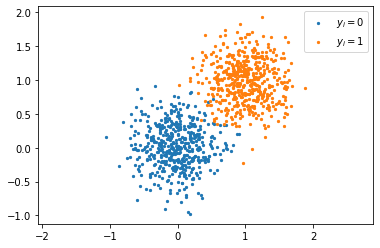

In [83]:
mean_0 = [0,0]
mean_1 = [1,1]
cov = [[0.1, 0], [0, 0.1]]
cnt_0 = 0
cnt_1 = 0
cntforone = 0
cntforzero = 0
random_list = []
for i in range(1000):
    random_list.append(randrange(2))

for i in range(len(random_list)):
    if random_list[i] == 0:
        cntforzero += 1
        if not cnt_0:
            x0_0, x1_0 = np.random.multivariate_normal(mean_0, cov, 1).T
            X0_0 = x0_0
            X1_0 = x1_0
            cnt_0 += 1
        else:
            x0_0, x1_0 = np.random.multivariate_normal(mean_0, cov, 1).T
            X0_0 = np.append(X0_0, x0_0)
            X1_0 = np.append(X1_0, x1_0)
    elif random_list[i] == 1:
        cntforone += 1
        if not cnt_1:
            x0_1, x1_1 = np.random.multivariate_normal(mean_1, cov, 1).T
            X0_1 = x0_1
            X1_1 = x1_1
            cnt_1 += 1
        else:
            x0_1, x1_1 = np.random.multivariate_normal(mean_1, cov, 1).T
            X0_1 = np.append(X0_1, x0_1)
            X1_1 = np.append(X1_1, x1_1)

# print(cntforone)
# print(cntforzero)
plt.scatter(X0_0, X1_0, s=5.0, label='$y_i = 0$')
plt.scatter(X0_1, X1_1, s=5.0, label='$y_i = 1$')
plt.axis('equal')
plt.legend()
plt.show()            

In [84]:
Xi_0 = np.stack((X0_0, X1_0), axis=-1)
y0 = np.zeros((Xi_0.shape[0],1))
Xi_0 = np.append(Xi_0, y0, axis=1)

Xi_1 = np.stack((X0_1, X1_1), axis=-1)
y1 = np.zeros((Xi_1.shape[0],1))
for i in range(y1.shape[0]):
    y1[i] = 1
Xi_1 = np.append(Xi_1, y1, axis=1)

Xi_final = np.concatenate((Xi_0, Xi_1),axis=0)
np.random.shuffle(Xi_final)
# print(Xi_final.shape)

## Model Construction and Result

In [85]:
X = Xi_final[:,:2]
y = Xi_final[:,2]

clf_Lo = LogisticRegression().fit(X,y)
y_pred = clf_Lo.predict(X)
confusion_matrix = metrics.confusion_matrix(y, y_pred)
print(classification_report(y, y_pred))
print('accuracy: ', accuracy_score(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       485
         1.0       0.98      0.99      0.99       515

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

accuracy:  0.986


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Math object>

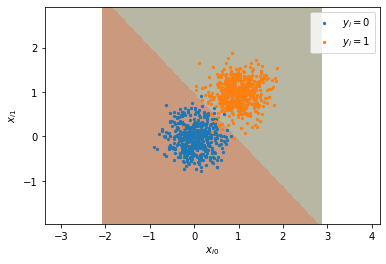

In [86]:
yi = "$ y_i = L(" + str(round(clf_Lo.intercept_[0],1)) + " + " + str(round(clf_Lo.coef_[0][0],1))+\
" \\times  " +" x_{i0}"  + " + "+str(round(clf_Lo.coef_[0][1],1))+" \\times  " +" x_{i1})" "$"
display(Math(yi))
# plt.scatter(0,0, label=yi)
# print("$y_i$", end='')
# print(yi)
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#cb997e', '#b7b7a4'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf_Lo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(Xi0_0, Xi1_0, s=5.0, label='$y_i = 0$')
plt.scatter(Xi0_1, Xi1_1, s=5.0, label='$y_i = 1$')

plt.xlabel('$x_{i0}$', fontsize = 10)
plt.ylabel('$x_{i1}$', fontsize = 10)
plt.axis('equal')
plt.legend()
plt.show()